# Quick start: Impacts of Falls Lake on streamflow...
Recall from the Excel bootcamps session that the first step was to get the streamflow data into our working environment (Excel then, Python here) and tidy the data up. From there, we'd plot and summarize the data. 

The code snippets below hint at the power of Python code; just a few lines can cover a number of clicks, selection, right-clicks, copy/paste,... and we quickly have a plot of stream flow from data pulled remotely. 

This dense Python code, while effective, doesn't reveal key nuances in the language nor its flexibility. So, we'll dash through this example, and then we'll examine equvalent, less dense code that (1) exposes more about Python and is more "Pythonic" (a term we'll define soon...)

### Preparing our script
* First we import Pandas - a Python data analytics library.

In [1]:
#Import the Pandas library
import pandas as pd

### Getting & tidying the data
* Next, we make a **request** to the the NWIS site hosting the data we want (using the **URL** formed when we queried the data in the Excel exercise). We store server's **response** as a Pandas **dataframe** named `df`. <font color=gray>(*There's a lot going on here that we'll dig into shortly...*)</font>

In [2]:
#Retrieve the data directly into a Pandas data frame named 'df'
url = ('http://waterservices.usgs.gov/nwis/dv/?' +
       'format=rdb&' +
       'sites=02087500&' +
       'startDT=1930-10-01&' +
       'endDT=2020-09-30&' +
       'statCd=00003&' +
       'parameterCd=00060&' +
       'siteStatus=all')
df = pd.read_csv(url,
                 skiprows=31,
                 sep='\t',
                 names=['agency_cd','site_no','datetime','MeanFlow_cfs','Confidence'],
                 dtype={'site_no':'str'},
                 parse_dates=['datetime'],
                 index_col='datetime'
                )

In [3]:
#Show the last 5 rows of the data frame
df.tail()

,agency_cd,site_no,MeanFlow_cfs,Confidence
datetime,,,,
2020-09-26,USGS,02087500,2240.0,A
2020-09-27,USGS,02087500,1770.0,A
2020-09-28,USGS,02087500,1530.0,A
2020-09-29,USGS,02087500,1670.0,A
2020-09-30,USGS,02087500,4250.0,A


### Plotting the data
Ok, we now have a local copy of the data, let's plot it!

In [4]:
#This statements enables plots in our Jupyter notebook
%matplotlib inline

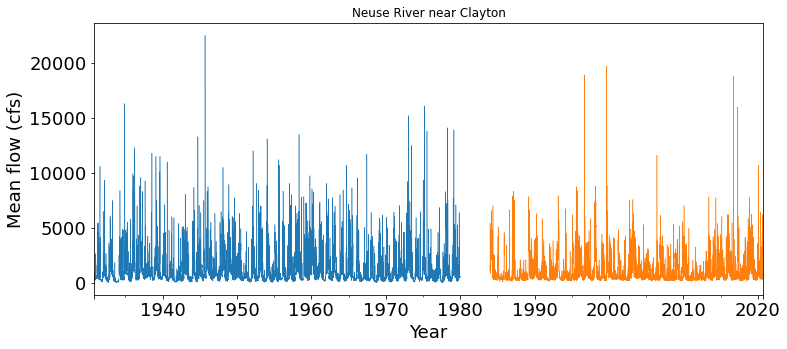

In [5]:
#Plot the data: Start with data up to 1980
ax = df[:'1979-12-31']['MeanFlow_cfs'].plot(title="Neuse River near Clayton",
                                            linewidth=0.5,
                                            figsize=(12,5),
                                            fontsize=18)
#...add the data from 1984 on
df['1984-01-01':]['MeanFlow_cfs'].plot(linewidth=0.5)

#...add some aesthetics
ax.set_ylabel("Mean flow (cfs)",fontsize=18)
ax.set_xlabel("Year",fontsize=18);

### Summarizing the data

In [6]:
df.describe()

,MeanFlow_cfs
count,32872.000000
mean,1119.801199
std,1508.203910
min,45.000000
25%,303.000000
50%,530.000000
75%,1220.000000
max,22500.000000


In [7]:
dfSummary = pd.concat((df.describe(),
                       df[:'1979-12-31'].describe(),
                       df['1984-01-01':].describe()),
                      axis='columns')
dfSummary.columns = ('All','1930-1980','1984-2017')
dfSummary

,All,1930-1980,1984-2017
count,32872.000000,17988.000000,13423.000000
mean,1119.801199,1168.435679,1066.708634
std,1508.203910,1653.651387,1314.364904
min,45.000000,45.000000,105.000000
25%,303.000000,301.000000,312.000000
50%,530.000000,581.000000,481.000000
75%,1220.000000,1210.000000,1220.000000
max,22500.000000,22500.000000,19700.000000


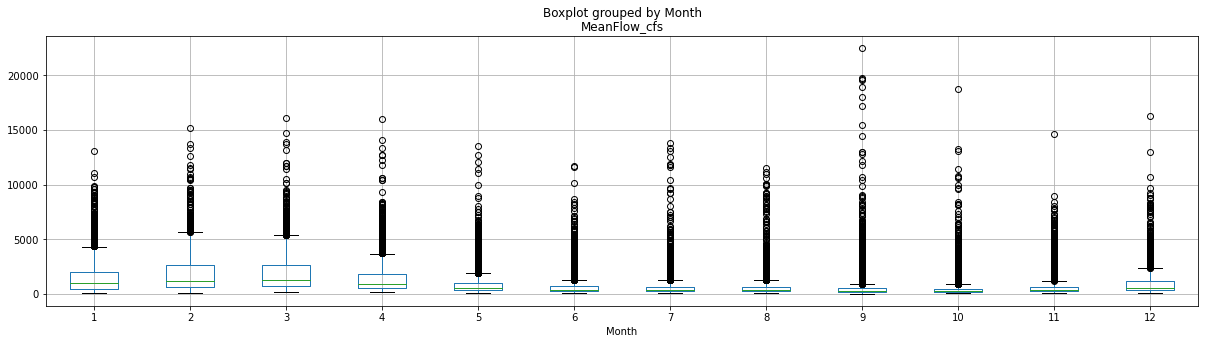

In [8]:
#Create a month field and plot values by month
df['Month'] = df.index.month
df.boxplot(column='MeanFlow_cfs',by='Month',figsize=(20,5));

### Boom! That was fast! 
But code written this tersely overlooks three key elements. 
- First, it's a bit hard to learn from; there's a lot going on here that's masked by compound statements. 
- Second, while effective, the code is note easily re-used. What if we wanted to do a similar analysis for a another gage site? It can be done, but it's not as easy as it could be. 
- And third, a key feature of Python code is that it's readable (when written correctly). This code is not as readable as good Python code should be.<br>**Try adding a new code box below and run the statement `import this`...**

*So, let's revisit these procedures, but more slowly and deliberately so that we might actually learn a thing or two...*